# Documentação do Challenge Telecom X por Murilo, estudante do curso de Ciência de Dados da Alura/Oracle.

📌 Extração

In [136]:
# Importação das bibliotecas
import requests
import pandas as pd
import json

In [137]:
# importação da API

with open('/content/TelecomX_Data.json', 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)


In [138]:
# Expandindo as colunas aninhadas com o método pd series
df_customer = df['customer'].apply(pd.Series)
df_account = df['account'].apply(pd.Series)
df_phone = df['phone'].apply(pd.Series)
df_internet = df['internet'].apply(pd.Series)

🔧 Transformação


Por padrão usarei df como nome principal da base.

In [146]:
df_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [147]:
print(df_customer.dtypes)
print(df_account.dtypes)
print(df_phone.dtypes)
print(df_internet.dtypes)

gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
tenure            int64
dtype: object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Charges             object
dtype: object
PhoneService     object
MultipleLines    object
dtype: object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object


In [148]:
df_full = pd.concat([df_customer, df_account, df_phone, df_internet], axis=1)

In [149]:
df_full.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],
      dtype='object')

In [152]:
df['Churn']

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


In [153]:
df_full.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
Charges,0
PhoneService,0


In [159]:
df_full.dropna(inplace=True)


In [161]:
df_charges = df_account['Charges'].apply(pd.Series)


In [162]:
df_charges.rename(columns={'Monthly': 'Charges.Monthly', 'Total': 'Charges.Total'}, inplace=True)


In [163]:
df_account = pd.concat([df_account.drop(columns=['Charges']), df_charges], axis=1)


In [164]:
df_full = pd.concat([df[['customerID', 'Churn']], df_customer, df_account, df_phone, df_internet], axis=1)


In [167]:
df_full.columns


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [168]:
df_full = df_full.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [169]:
df_full.duplicated().sum()


np.int64(0)

In [170]:
df_full.drop_duplicates(inplace=True)


In [171]:
for col in df_full.select_dtypes(include='object').columns:
    print(f"{col}: {df_full[col].unique()}")


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']


In [172]:
df_full['Churn'] = df_full['Churn'].str.capitalize()


In [173]:
def preparar_dataframe_completo(df):
    # Expandir sub-blocos do JSON
    df_customer = df['customer'].apply(pd.Series)
    df_account = df['account'].apply(pd.Series)
    df_phone = df['phone'].apply(pd.Series)
    df_internet = df['internet'].apply(pd.Series)

    # Expandir os campos internos da coluna Charges
    df_charges = df_account['Charges'].apply(pd.Series)
    df_charges.rename(columns={'Monthly': 'Charges.Monthly', 'Total': 'Charges.Total'}, inplace=True)

    # Atualizar df_account sem a coluna antiga
    df_account = pd.concat([df_account.drop(columns=['Charges']), df_charges], axis=1)

    # Juntar todas as partes no DataFrame final
    df_full = pd.concat([
        df[['customerID', 'Churn']],  # Dados de identificação e variável alvo
        df_customer,
        df_account,
        df_phone,
        df_internet
    ], axis=1)

    # Limpeza de texto
    df_full = df_full.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    # Remover duplicatas
    df_full.drop_duplicates(inplace=True)

    return df_full


FAZENDO A ANÁLISE DAS CONTAS DIÁRIAS

Clientes que pagam pouco por dia e mesmo assim desistem;

Perfis que investem alto diariamente, mas podem estar insatisfeitos.

In [174]:
df_full['Contas_Diarias'] = df_full['Charges.Monthly'] / 30

In [175]:
df_full['Contas_Diarias'] = df_full['Contas_Diarias'].round(2)


In [176]:
binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

for col in binarias:
    df_full[col] = df_full[col].map({'Yes': 1, 'No': 0})


In [177]:
df_full['gender'] = df_full['gender'].map({'Female': 1, 'Male': 0})


In [178]:
df_full['SeniorCitizen'] = df_full['SeniorCitizen'].astype(int)


In [179]:
df_full = pd.get_dummies(df_full, columns=['Contract', 'PaymentMethod', 'InternetService'], drop_first=True)


In [180]:
df_full.columns = df_full.columns.str.replace('.', '_', regex=False).str.lower()


📊 Carga e análise


In [181]:
df_full.describe(include='all')


,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,paperlessbilling,charges_monthly,charges_total,...,streamingtv,streamingmovies,contas_diarias,contract_one year,contract_two year,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,internetservice_fiber optic,internetservice_no
count,7267,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267,...,5686.000000,5686.000000,7267.000000,7267,7267,7267,7267,7267,7267,7267
unique,7267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6531,...,NaN,NaN,NaN,2,2,2,2,2,2,2
top,9995-HOTOH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.2,...,NaN,NaN,NaN,False,False,False,False,False,False,False
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,...,NaN,NaN,NaN,5748,5524,5699,4822,5602,4069,5686
mean,NaN,0.265370,0.494289,0.162653,0.484106,0.300124,32.346498,0.593230,64.720098,NaN,...,0.490679,0.495251,2.157292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.441561,0.500002,0.369074,0.499782,0.458343,24.571773,0.491265,30.129572,NaN,...,0.499957,0.500021,1.004407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,NaN,...,0.000000,0.000000,0.610000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.425000,NaN,...,0.000000,0.000000,1.180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.300000,NaN,...,0.000000,0.000000,2.340000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.875000,NaN,...,1.000000,1.000000,2.995000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


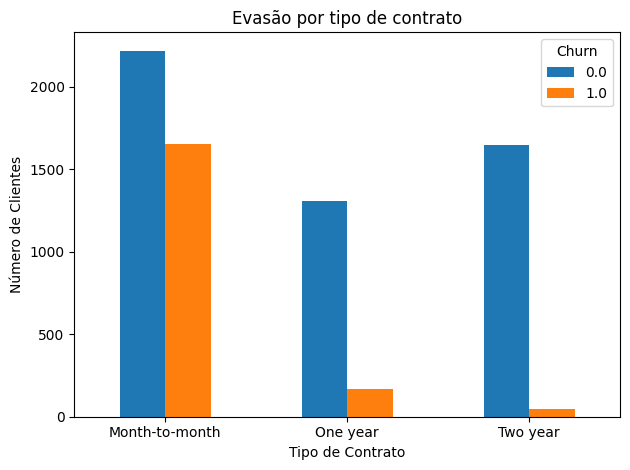

In [187]:
import matplotlib.pyplot as plt

# Recriando uma coluna 'contract' interpretada a partir das dummies
def get_tipo_contrato(row):
    if row['contract_one year'] == 1:
        return 'One year'
    elif row['contract_two year'] == 1:
        return 'Two year'
    else:
        return 'Month-to-month'

df_full['contract_label'] = df_full.apply(get_tipo_contrato, axis=1)

# Agora, agrupamos corretamente para o gráfico
contrato = df_full.groupby(['contract_label', 'churn']).size().unstack()
contrato.plot(kind='bar', stacked=False)
plt.title('Evasão por tipo de contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


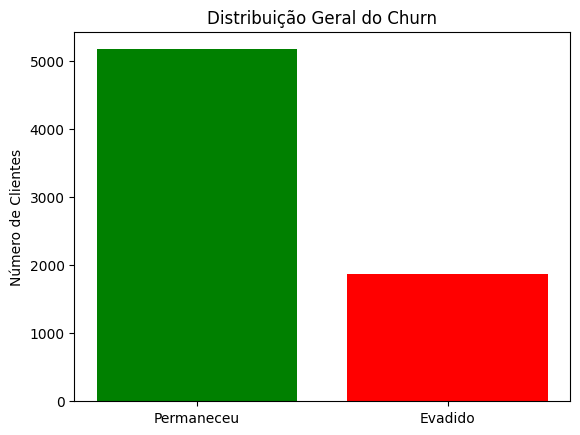

In [188]:
churn_counts = df_full['churn'].value_counts()
plt.bar(['Permaneceu', 'Evadido'], churn_counts, color=['green', 'red'])
plt.title('Distribuição Geral do Churn')
plt.ylabel('Número de Clientes')
plt.show()


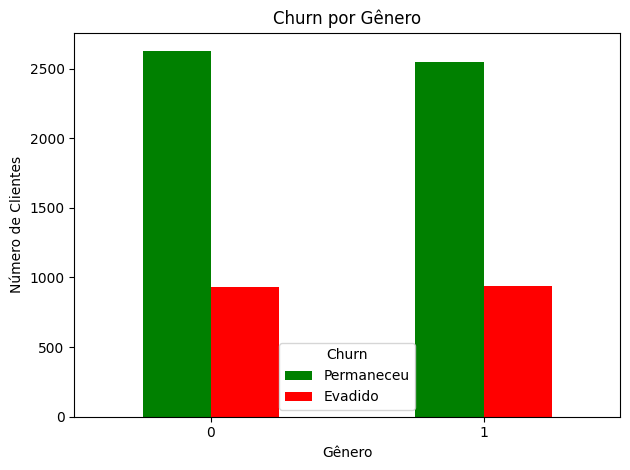

In [189]:
import matplotlib.pyplot as plt

genero = df_full.groupby(['gender', 'churn']).size().unstack()
genero.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.title('Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Permaneceu', 'Evadido'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


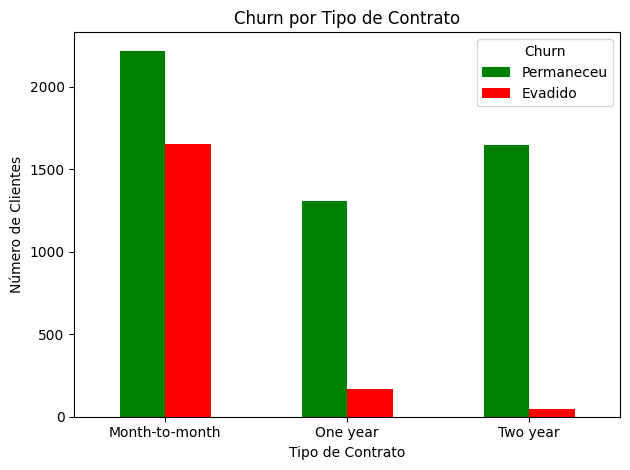

In [190]:
# Contrato já reconstruído com contract_label
contrato = df_full.groupby(['contract_label', 'churn']).size().unstack()

contrato.plot(kind='bar', color=['green', 'red'])
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Permaneceu', 'Evadido'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


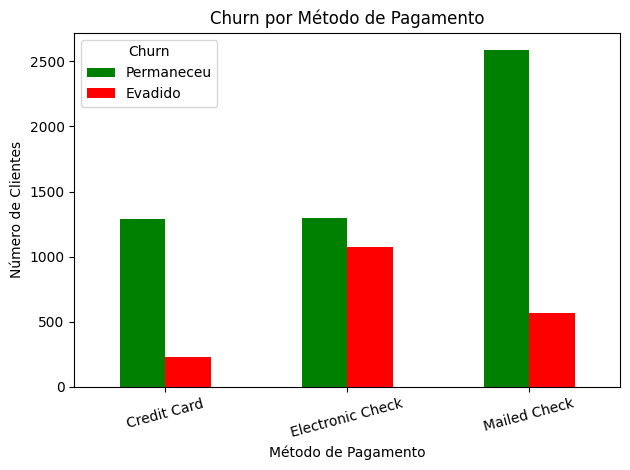

In [191]:
def get_pagamento(row):
    if row.get('paymentmethod_bank transfer (automatic)', 0) == 1:
        return 'Bank Transfer'
    elif row.get('paymentmethod_credit card (automatic)', 0) == 1:
        return 'Credit Card'
    elif row.get('paymentmethod_electronic check', 0) == 1:
        return 'Electronic Check'
    else:
        return 'Mailed Check'

df_full['payment_label'] = df_full.apply(get_pagamento, axis=1)

# Agrupar e plotar
pagamento = df_full.groupby(['payment_label', 'churn']).size().unstack()

pagamento.plot(kind='bar', color=['green', 'red'])
plt.title('Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Permaneceu', 'Evadido'])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


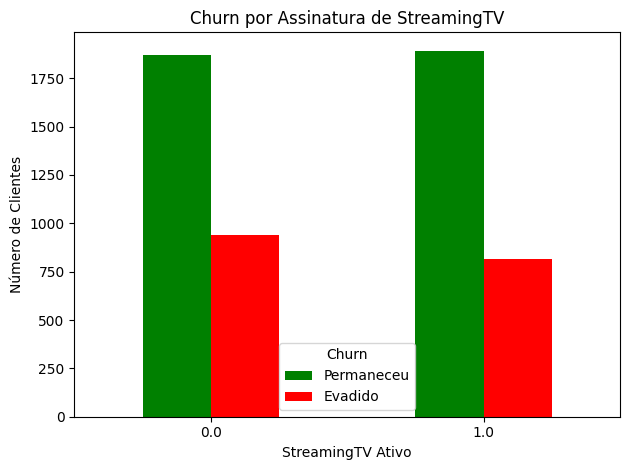

In [192]:
streaming = df_full.groupby(['streamingtv', 'churn']).size().unstack()

streaming.plot(kind='bar', color=['green', 'red'])
plt.title('Churn por Assinatura de StreamingTV')
plt.xlabel('StreamingTV Ativo')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Permaneceu', 'Evadido'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


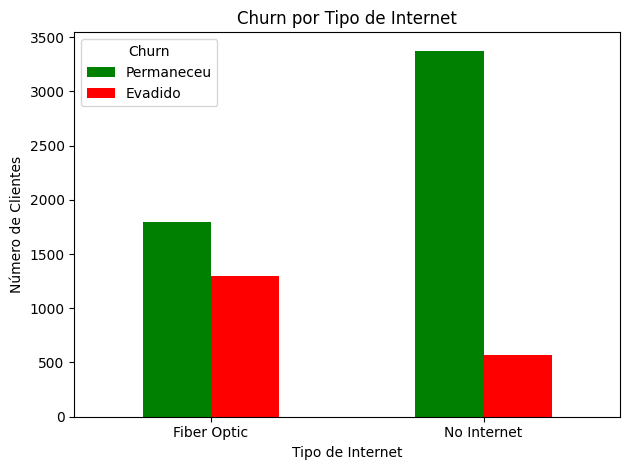

In [193]:
def get_internet_tipo(row):
    if row.get('internetservice_dsl', 0) == 1:
        return 'DSL'
    elif row.get('internetservice_fiber optic', 0) == 1:
        return 'Fiber Optic'
    else:
        return 'No Internet'

df_full['internet_label'] = df_full.apply(get_internet_tipo, axis=1)

internet = df_full.groupby(['internet_label', 'churn']).size().unstack()

internet.plot(kind='bar', color=['green', 'red'])
plt.title('Churn por Tipo de Internet')
plt.xlabel('Tipo de Internet')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Permaneceu', 'Evadido'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


EXTRA

In [195]:
df_full = df_full[df_full['churn'].notna()]


In [197]:
correlacao = df_full.corr(numeric_only=True)


In [198]:
correlacao['churn'].sort_values(ascending=False)


,churn
churn,1.000000
internetservice_fiber optic,0.308020
paymentmethod_electronic check,0.301919
contas_diarias,0.193412
charges_monthly,0.193356
paperlessbilling,0.191825
seniorcitizen,0.150889
multiplelines,0.040207
phoneservice,0.011942
gender,0.008612


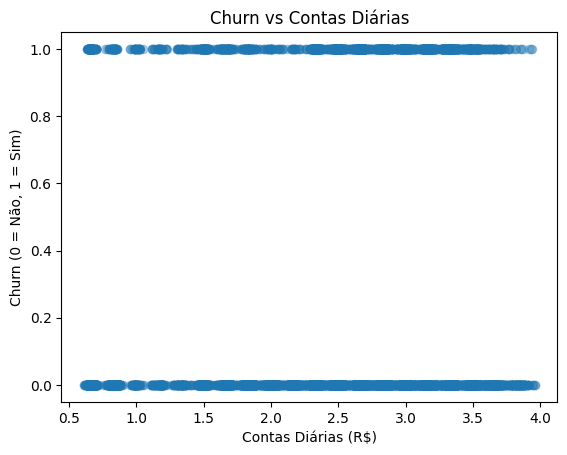

In [199]:
plt.scatter(df_full['contas_diarias'], df_full['churn'], alpha=0.3)
plt.title('Churn vs Contas Diárias')
plt.xlabel('Contas Diárias (R$)')
plt.ylabel('Churn (0 = Não, 1 = Sim)')
plt.show()


In [200]:
servicos = ['phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup',
            'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

df_full['qtd_servicos'] = df_full[servicos].sum(axis=1)


In [201]:
print(df_full[['qtd_servicos', 'churn']].corr())


              qtd_servicos     churn
qtd_servicos      1.000000 -0.067264
churn            -0.067264  1.000000


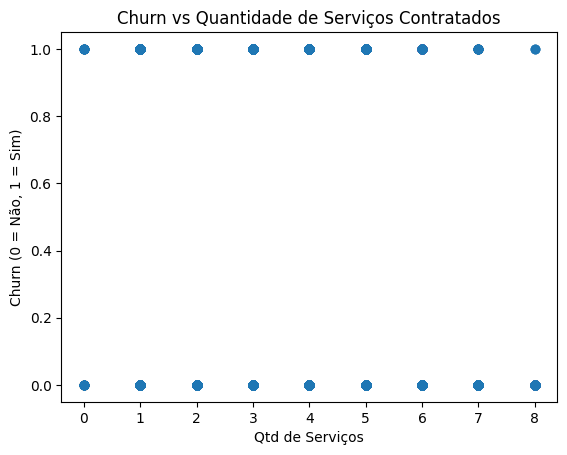

In [202]:
plt.scatter(df_full['qtd_servicos'], df_full['churn'], alpha=0.3)
plt.title('Churn vs Quantidade de Serviços Contratados')
plt.xlabel('Qtd de Serviços')
plt.ylabel('Churn (0 = Não, 1 = Sim)')
plt.show()


📄Relatorio Final
